In [1]:
from pathlib import Path
from pprint import pprint
import pickle as pkl
from typing import Literal

import matplotlib.pylab as plt
from matplotlib.axes._axes import Axes
import numpy as np

from HexLattice import HexCell, HexLattice, Coordinate, AxialCoordinate, DoubleWidthCoordinate, PlotConfig, ValidDirections

## Generate Simons HexLattice

In [2]:
VALID_RADIUS = 10
FUEL_RADIUS = 1 / np.sqrt(3)
COOLER_RADIUDS = 0.5 / np.sqrt(3)

In [3]:
def coord_is_valid(coord: Coordinate) -> bool:
    return coord.cartesian.x ** 2 + coord.cartesian.y ** 2 <= VALID_RADIUS ** 2

In [4]:
simons: list[Coordinate] = list()
wait_list = list()
wait_list.append(Coordinate(DoubleWidthCoordinate(0, 0)))
while wait_list:
    pop_coord: Coordinate = wait_list.pop()
    
    # 如果坐标在半径内加入simons
    if coord_is_valid(pop_coord):
        simons.append(pop_coord)
        
    # 将合法的坐标的邻居加入等待列表
    for coord in pop_coord.get_all_neighbour():
        if coord_is_valid(coord) & (coord not in simons):
            wait_list.append(coord)

In [5]:
hexcell_list:list[HexCell] = list()
for coord in simons:
    
    coord_text = f'({coord.double_width.x}, {coord.double_width.z})'
    # 燃料
    if coord.double_width.x % 3 == 0:
        hexcell_list.append(HexCell(coord, radius=FUEL_RADIUS, text=coord_text))
    # 氦氙冷却剂
    else:
        hexcell_list.append(HexCell(coord, radius=COOLER_RADIUDS, text=coord_text))
                                    
hl = HexLattice(hexcell_list)

In [6]:
hexcell_list[5].cartesian

CartesianCoordinate(x=2.5, y=4.330127018922193)

## Write data into HexCells

## Plot

In [7]:
pc = PlotConfig('Simons')
pc.image_root_dir = Path('examples/plot')
pc.figure_size = (7, 7)
pc.figure_expand = 0.1
pc.text_size = 7
pc.image_type = 'png'
pc.plot_style = 'bmh'

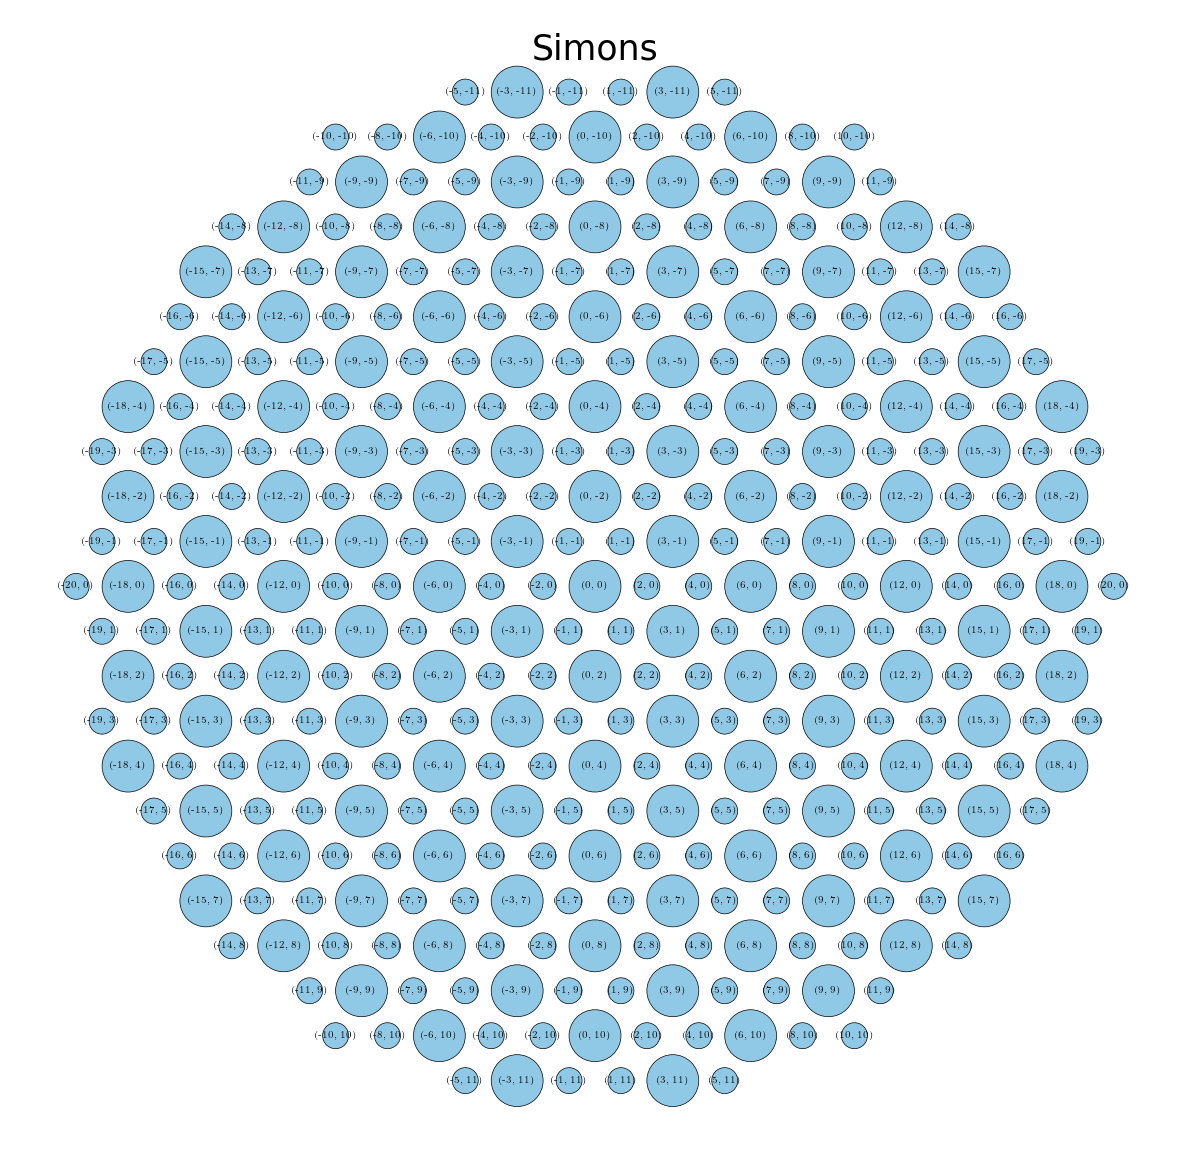

In [8]:
fig = plt.figure(figsize=(12, 12))
axes: Axes = fig.subplots()
hl.plot_circle(pc, axes, 'text')
fig.tight_layout()
plt.savefig(pc.image_path)
plt.show()
plt.close()